In [2]:
import os 
f=os.listdir('autocorrection')
f


['.ipynb_checkpoints', 'big.txt', 'Building a spelling corrector.ipynb']

In [4]:
import re 
fi=open('autocorrection/big.txt','r')
data=fi.read()
fi.close()

In [6]:
data

'The Project Gutenberg EBook of The Adventures of Sherlock Holmes\nby Sir Arthur Conan Doyle\n(#15 in our series by Sir Arthur Conan Doyle)\n\nCopyright laws are changing all over the world. Be sure to check the\ncopyright laws for your country before downloading or redistributing\nthis or any other Project Gutenberg eBook.\n\nThis header should be the first thing seen when viewing this Project\nGutenberg file.  Please do not remove it.  Do not change or edit the\nheader without written permission.\n\nPlease read the "legal small print," and other information about the\neBook and Project Gutenberg at the bottom of this file.  Included is\nimportant information about your specific rights and restrictions in\nhow the file may be used.  You can also find out about how to make a\ndonation to Project Gutenberg, and how to get involved.\n\n\n**Welcome To The World of Free Plain Vanilla Electronic Texts**\n\n**eBooks Readable By Both Humans and By Computers, Since 1971**\n\n*****These eBooks 

In [8]:
t=data.lower()
t=re.sub('[^a-z]',' ',t)
j=t.split()
j

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'sir',
 'arthur',
 'conan',
 'doyle',
 'in',
 'our',
 'series',
 'by',
 'sir',
 'arthur',
 'conan',
 'doyle',
 'copyright',
 'laws',
 'are',
 'changing',
 'all',
 'over',
 'the',
 'world',
 'be',
 'sure',
 'to',
 'check',
 'the',
 'copyright',
 'laws',
 'for',
 'your',
 'country',
 'before',
 'downloading',
 'or',
 'redistributing',
 'this',
 'or',
 'any',
 'other',
 'project',
 'gutenberg',
 'ebook',
 'this',
 'header',
 'should',
 'be',
 'the',
 'first',
 'thing',
 'seen',
 'when',
 'viewing',
 'this',
 'project',
 'gutenberg',
 'file',
 'please',
 'do',
 'not',
 'remove',
 'it',
 'do',
 'not',
 'change',
 'or',
 'edit',
 'the',
 'header',
 'without',
 'written',
 'permission',
 'please',
 'read',
 'the',
 'legal',
 'small',
 'print',
 'and',
 'other',
 'information',
 'about',
 'the',
 'ebook',
 'and',
 'project',
 'gutenberg',
 'at',
 'the',
 'bottom',
 'of',
 'this',
 '

In [10]:
from collections import Counter,defaultdict
count=Counter(j)
len(count)

29157

In [12]:
len(j)

1105285

In [14]:
def split(word):
    l=[]
    for i in range(len(word)+1):
        l.append((word[:i],word[i:]))
    return l

In [16]:
alp='abcdeghijklmnopqrstuvwxyz'

In [18]:
def candidate(p):
    can=[]
    for i in p:
        l1=i[0]
        l2=i[1]
        for j in alp:
            can.append(l1+j+l2)
    for i in p:
        l1=i[0]
        l2=i[1]
        can.append(l1+l2[1:])
    for i in range(len(p)-1):
        l1=p[i][0]
        l2=p[i][1]
        for h in alp:
            can.append(l1+h+l2[1:])
    for i in range(len(p)-2):
        l1=p[i][0]
        l2=p[i][1]
        if len(l2)>1:
            can.append(l1+l2[1]+l2[0]+l2[2:])
    return can

In [20]:
def known(p):
    c=[]
    c=[x for x in set(p) if x in j]
    return c

In [22]:
def autocorrect(word):
    if word in set(j):
        return word
    else:
        return known(candidate(split(word)))

In [24]:
pro=defaultdict(lambda: 0)
for l in count.keys():
    pro[l]=count[l]/len(j)

In [26]:
word=input('enter a word to get corrected:')
corrected=autocorrect(word)
print('corrected form(s)>>>',corrected)

enter a word to get corrected: hey


corrected form(s)>>> hey


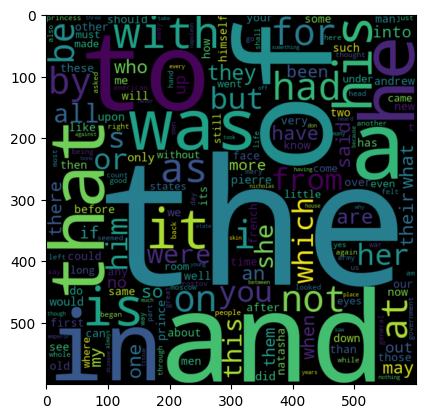

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
s=WordCloud(width=600,height=600,background_color='black').generate_from_frequencies(count)
plt.imshow(s,interpolation='bilinear')
plt.show()